### Survival Analysis :
* A subfield of Statistics that deals with anlysing the time until a certain event happens.
* Could be :
    * The amount of time until a machine fails
    * The time until a constumer converts to premium
* The kind of questions Survival Analysis answers :
    * Time until a machine fails which is relevant in engineering and manufacturing industries to predict when machines or components are likely to break down or require maintenance.
    * Time until a customer converts to premium as in marketing and business. 
    * Time until a medical patient experiences a specific health event.

#### The Kaplan Meier Estimator is a Survival Analysis Estimation Technique that consists of estimating the Survival Function.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from lifelines import KaplanMeierFitter
from lifelines.statistics import (logrank_test,
                                  pairwise_logrank_test,
                                  multivariate_logrank_test,
                                  survival_difference_at_fixed_point_in_time_test
                                 )

In [9]:
# Set the style for data visualization (Seaborn style)
plt.style.use("seaborn")

C:\Users\Samia\AppData\Local\Temp\ipykernel_7792\1490283864.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [14]:
# read CSV Data of Customer Churn
df = pd.read_csv('Telco-Customer-Churn.csv')

In [15]:
# View the first 5 rows of the data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [16]:
# Encode Target Feature 'Churn' to Numeric (0,1)
df['Churn'] =[1 if x=='Yes' else 0 for x in df['Churn']]

Text(0.5, 1.0, 'Kaplan-Meier-Curve')

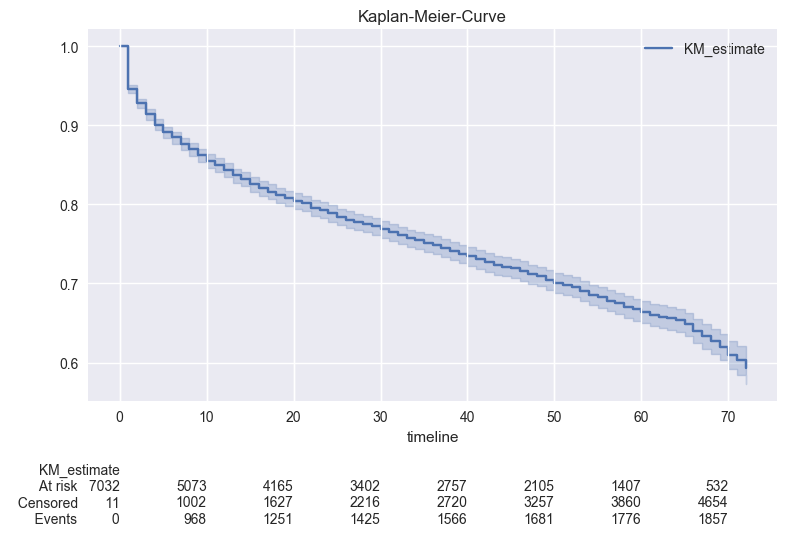

In [22]:
# Define 'T' time-to-event data (tenure)
# Define 'E' as the event indicator data (Churn).
T = df['tenure']
E = df['Churn']

# Create a KaplanMeierFitter object
kmf = KaplanMeierFitter()

# Fit the Kaplan-Meier survival curve to customer data
kmf.fit(T ,event_observed = E)

# Plot the Kaplan-Meier curve, and include the number "at risk" at each time point
kmf.plot(at_risk_counts = True)

# Set a title for the plot
plt.title('Kaplan-Meier-Curve')